### Group 1 Inter Annotator Agreement Analysis
- Author: Sushma Anand Akoju, Email: sushmaakoju@arizona.edu

In [1]:
!pip install agreement

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install krippendorff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pycm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.7/595.7 KB 12.8 MB/s eta 0:00:00


In [4]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/Colab\ Notebooks/natural\-logic
!ls

Mounted at /content/gdrive/
/content/gdrive/MyDrive/Colab Notebooks/natural-logic
 annotations_round2.xlsx
 clean
 clean.tar.xz
 dec5th_results
 example-annotation-round-1-2.xlsx
 example-annotation-round-1.gsheet
 example-predictions-for-rsa.gsheet
 example-predictions-for-rsa.xlsx
 final-datasets
 folio
 FOLIO_dataset_extraction_solvers.ipynb
 logic-summer-school-FOTP.pdf
 modified-examples-annotations-sa.xlsx
'modified_noun_phrases (1).gsheet'
'modified_noun_phrases (2).gsheet'
'modified_noun_phrases (3).gsheet'
'modified_noun_phrases (4).gsheet'
'modified_noun_phrases (5).gsheet'
'modified_noun_phrases (6).gsheet'
 modified_noun_phrases.csv
 modified_noun_phrases.gsheet
 modified_sentences1.csv
'modified_sentences (1).gsheet'
 modified_sentences1.gsheet
'modified-sentences (1).xlsx'
 modified_sentences.csv
 modified-sentences-dec1.xlsx
 modified_sentences.gsheet
'modified_verb_phrases (1).gsheet'
'modified_verb_phrases (2).gsheet'
'modified_verb_phrases (3).gsheet'
 modified_verb_p

In [5]:
import sklearn.metrics
from sklearn.metrics import cohen_kappa_score

In [6]:
import pandas as pd
import numpy as np

In [7]:
%cd /content/gdrive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/annotated/combined/
!ls 


/content/gdrive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/annotated/combined
annotators_group_1.xlsx      blocks_ann12.png		      group1
annotators_group_2.xlsx      blocks_ann21.png		      group2
blocks_ann_12_modifier.xlsx  disagreement_labels_ann_12.xlsx


In [8]:
filename = "/content/gdrive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/annotated/combined/annotators_group_1.xlsx"

In [9]:
import os
os.path.exists(filename)

True

In [10]:
sheet_names = pd.ExcelFile(filename).sheet_names[:-1]
sheet_names

['block_0_90',
 'block_1_116',
 'block_3_130',
 'block_4_150',
 'block_5_167',
 'block_6_168']

In [11]:
df_list = []
for sheetname in sheet_names:
  df = pd.read_excel(filename, sheet_name=sheetname)
  print(df.shape, df.columns)
  df_list.append(df)

(93, 9) Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
       'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'M',
       'E', 'S'],
      dtype='object')
(93, 9) Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
       'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'M',
       'E', 'Ground Truth'],
      dtype='object')
(93, 9) Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
       'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'M',
       'E', 'Ground Truth'],
      dtype='object')
(93, 9) Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
       'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'M',
       'E', 'Ground Truth'],
      dtype='object')
(93, 11) Index(['Unnamed: 0', 'SICK_id', 'Premise', 'Hypothesis', 'Modifier',
       'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'M',
       'Unnamed: 8', 'E', 'Ground truth'],
      dtype='object')
(93, 12) Index(['SICK_

In [12]:
len(df_list)

6

In [13]:
group1 = pd.concat(df_list)
group1.shape[0]

558

## Labelling annotator names to numbers 1 through 5 respectively

In [14]:
group1 = group1[['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
       'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified', 'M',
       'E']]
group1['SICK_id'] = group1['SICK_id'].astype('int')

group1.head()

<ipython-input-14-7695dec4268a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['SICK_id'] = group1['SICK_id'].astype('int')


,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Part of Premise/Hypothesis Modified,M,E
0,90,a man is jumping into an empty pool,a man is jumping into a full pool,NONE,NONE,NONE,Contradiction,Contradiction
1,90,every man is jumping into an empty pool,a man is jumping into a full pool,every,Premise,Subject,Alternation,Contradiction
2,90,a man is jumping into an empty pool,every man is jumping into a full pool,every,Hypothesis,Subject,Negation,Contradiction
3,90,every man is jumping into an empty pool,every man is jumping into a full pool,every,Both,Subject,Negation,Contradiction
4,90,some man is jumping into an empty pool,a man is jumping into a full pool,some,Premise,Subject,Alternation,Neutral


In [15]:
group1['M'] = group1['M'].apply(lambda x: "Negation" if x == "Contradiction" else x )
group1['E'] = group1['E'].apply(lambda x: "Negation" if x == "Contradiction" else x )
group1['E'] = group1['E'].apply(lambda x: "FE" if x == "EF" else x )
group1

,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Part of Premise/Hypothesis Modified,M,E
0,90,a man is jumping into an empty pool,a man is jumping into a full pool,NONE,NONE,NONE,Negation,Negation
1,90,every man is jumping into an empty pool,a man is jumping into a full pool,every,Premise,Subject,Alternation,Negation
2,90,a man is jumping into an empty pool,every man is jumping into a full pool,every,Hypothesis,Subject,Negation,Negation
3,90,every man is jumping into an empty pool,every man is jumping into a full pool,every,Both,Subject,Negation,Negation
4,90,some man is jumping into an empty pool,a man is jumping into a full pool,some,Premise,Subject,Alternation,Neutral
...,...,...,...,...,...,...,...,...
88,168,A child is hitting a baseball,A child is missing exactly one baseball,exactly one,Hypothesis,Object,Alternation,Neutral
89,168,A child is hitting exactly one baseball,A child is missing exactly one baseball,exactly one,Both,Object,Alternation,Neutral
90,168,A child is hitting a an elegant baseball,A child is missing a baseball\n,an elegant,Premise,Object,Alternation,Neutral
91,168,A child is hitting a baseball,A child is missing a an elegant baseball,an elegant,Hypothesis,Object,Alternation,Neutral


In [16]:
group1['M'].unique(), group1['E'].unique()

(array(['Negation', 'Alternation', 'Neutral', 'FE', 'RE', 'Equivalence',
        'Entailment'], dtype=object),
 array(['Negation', 'Neutral', 'RE', 'FE', 'Equivalence'], dtype=object))

## Labelling the labels names to numbers 1 through 7 respectively
'FE':1 
'RE':2 
'Negation':3
'Cover':4
'Alternation':5
'Equivalence':6
'Neutral':7

In [17]:
label_map = {'FE':1, 'RE':2, 'Negation':3, 'Neutral':4, 'Alternation':5, 'Equivalence':6, 'Cover':7}

In [18]:
for i in ['M', 'E']:
  group1[i] = group1[i].map(label_map)

In [19]:
group1.head()

,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Part of Premise/Hypothesis Modified,M,E
0,90,a man is jumping into an empty pool,a man is jumping into a full pool,NONE,NONE,NONE,3.0,3
1,90,every man is jumping into an empty pool,a man is jumping into a full pool,every,Premise,Subject,5.0,3
2,90,a man is jumping into an empty pool,every man is jumping into a full pool,every,Hypothesis,Subject,3.0,3
3,90,every man is jumping into an empty pool,every man is jumping into a full pool,every,Both,Subject,3.0,3
4,90,some man is jumping into an empty pool,a man is jumping into a full pool,some,Premise,Subject,5.0,4


In [20]:
group1['M'][group1['M'].isna()] = 1

<ipython-input-20-4be6dbc162a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['M'][group1['M'].isna()] = 1


In [21]:
group1['M'][group1['M'].isna()]

Series([], Name: M, dtype: float64)

In [22]:
group1['M'] = group1['M'].astype('int')

## Remove a couple of rows (which are repetition of original premise hypothesis pair


In [23]:
# df = df.dropna(axis='rows')

In [24]:
group1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 92
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   SICK_id                              558 non-null    int64 
 1   Premise                              558 non-null    object
 2   Hypothesis                           558 non-null    object
 3   Modifier                             558 non-null    object
 4   Premise/Hypothesis/Both              558 non-null    object
 5   Part of Premise/Hypothesis Modified  558 non-null    object
 6   M                                    558 non-null    int64 
 7   E                                    558 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 39.2+ KB


In [25]:
target = ['FE', 'RE', 'Neutral', 'Equivalence', 'Cover', 'Negation']

## Cohen Kappa Score
A pairwise inetr-rater reliability statistic. 
Considering probability of agreement by chance.
We have 7 labels and 2 annotators and 558 observations in total.
So labels are mutually exclusive. (Assume so for now)
$p_0$ relative observed agreement
$p_1$ hypothetical agreement by chance
$p_0 = \frac{1}{558^2} \sum n_{k_1} n_{k_2} $  where $n_{k_1}$ and $n_{k_2}$ are number of times rater i (first or second) labelled k. 

These scores are calculated pairwise so at any time it is agreement between two raters.

In [26]:
labellers = {1:'M', 2:'E'}
cohen_kappa_scores = {}

cohen_kappa_scores[(labellers[1], labellers[2])] = cohen_kappa_score(group1[labellers[1]], group1[labellers[2]])
print(cohen_kappa_scores[(labellers[1], labellers[2])])

0.2568295855788887


## Pairwise agreement Cohen Kappa scores

In [27]:
cohen_kappa_scores

{('M', 'E'): 0.2568295855788887}

In [28]:
modified_df = group1.copy()

### Label-wise agreements (as a confusion matrix)
- First we'd like to assess the maximum agreement between each pair of annotators for each label they labelled.
- We consider that Mihai's labels as Gold standard for a point of reference closer to ground truth.
- We also consider that there might be maximum Forward Entailments considering it was the label most chosen. This also partially makes this an imbalanced class distribution even though these are not Ground truth labels.

In [29]:
from pycm import *

cm = ConfusionMatrix(actual_vector=group1['M'].to_numpy(), predict_vector=modified_df['E'].to_numpy()) 

## Seeing maximum agreement for the label that was chosen most of the times for just two annotators.

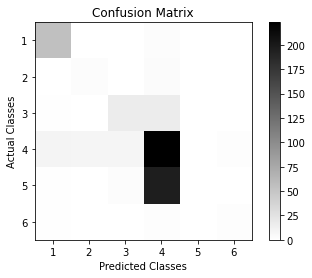

In [30]:
cm.plot()

In [31]:
cm.print_matrix()

Predict   1         2         3         4         5         6         
Actual
1         55        0         0         3         0         0         

2         0         3         0         4         0         0         

3         1         0         17        17        0         0         

4         10        9         9         223       0         2         

5         1         0         3         196       0         0         

6         1         0         0         2         0         2         




In [32]:
cm.table

{1: {1: 55, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0},
 2: {1: 0, 2: 3, 3: 0, 4: 4, 5: 0, 6: 0},
 3: {1: 1, 2: 0, 3: 17, 4: 17, 5: 0, 6: 0},
 4: {1: 10, 2: 9, 3: 9, 4: 223, 5: 0, 6: 2},
 5: {1: 1, 2: 0, 3: 3, 4: 196, 5: 0, 6: 0},
 6: {1: 1, 2: 0, 3: 0, 4: 2, 5: 0, 6: 2}}

In [33]:
label_map

{'FE': 1,
 'RE': 2,
 'Negation': 3,
 'Neutral': 4,
 'Alternation': 5,
 'Equivalence': 6,
 'Cover': 7}

In [34]:
lmap = {1:'FE', 2:'RE', 3:'Negation', 4:'Neutral', 5:'Alternation', 6:'Equivalence', 7:'Cover'}

In [35]:
a1_counts = {}
for k, v in group1['M'].value_counts().to_dict().items():
  a1_counts[lmap[k]] = v
a1_counts

{'Neutral': 253,
 'Alternation': 200,
 'FE': 58,
 'Negation': 35,
 'RE': 7,
 'Equivalence': 5}

In [36]:
a2_counts = {}
for k, v in group1['E'].value_counts().to_dict().items():
  a2_counts[lmap[k]] = v
a2_counts

{'Neutral': 445, 'FE': 68, 'Negation': 29, 'RE': 12, 'Equivalence': 4}

In [37]:
sum_counts = {}
for key in ['FE','RE', 'Neutral','Negation','Equivalence' ]:
  sum_counts[key] = a1_counts[key] + a2_counts[key]
sum_counts['Alternation'] = a1_counts['Alternation']
sum_counts

{'FE': 126,
 'RE': 19,
 'Neutral': 698,
 'Negation': 64,
 'Equivalence': 9,
 'Alternation': 200}

## Observing F1, precision and recall scores for pairwise confusion matrices.
In this case, we consider a case where each annotator i can be Gold label annotator and compared with every other annotator j from remaining 1 annotators. So we consider the case that chosen Gold labels i.e. annotator's labels as Ground truth and we calculate pairwise "Supposed Gold label" with another annotator's labels. 

This is to say between any two annotators, we choose any one annotator, we would like to see how much agreement can exist and how would that reflect as F1, precision and recall scores.

- For each pair of annotators, consider ith annotator to have ground truth and jth annotator to be prediction labels.
- We still observe maximum agreement >50% for Neutral Labels.
- We do observ ~53% precision, recall and F1-scores. Would not be very helpful, since we do not have "True Gold labels". 
- We use the following information for assessing how to design annotation schemes annotating automatically modified premise, hypothesis sentences with Generalized quantifiers as well as Adjectives & adverbs.
- We want to observe the amount of labeling confusion that quantifiers and modifiers introduce.
- We consider that wherever the label is not FE or RE, we can see maximum confusion. 
- Neutral - has max agreement & is second most chosen label
- Forward Entailment - has second best agreement & is also second most chosen label
- All other cases, signify confusion due to level of difficulty.

Total 558 * 2 = 1116 labels required by 2 annotators for 558 premise, hypothesis pairs.

1.  FE	- 126
2.  RE - 19
3.  Neutral - 698
4.  Negation - 64
5.  Cover - 0
6.  Alternation - 200
7.  Equivalence - 9


In [38]:

cm = {}

cm[('M', 'E')] = ConfusionMatrix(actual_vector=modified_df['M'].to_numpy(), predict_vector=modified_df['E'].to_numpy())
cm[('E','M')] = ConfusionMatrix(actual_vector=modified_df['E'].to_numpy(), predict_vector=modified_df['M'].to_numpy())
print(cm[('M', 'E')])
print(cm[('E','M')])

Predict   1         2         3         4         5         6         
Actual
1         55        0         0         3         0         0         

2         0         3         0         4         0         0         

3         1         0         17        17        0         0         

4         10        9         9         223       0         2         

5         1         0         3         196       0         0         

6         1         0         0         2         0         2         





Overall Statistics : 

95% CI                                                            (0.49627,0.579)
ACC Macro                                                         0.84588
ARI                                                               0.24559
AUNP                                                              0.60162
AUNU                                                              0.6956
Bangdiwala B                                                      0.45097
Bennett S   

### Seeing the Confusion matrix density plots for Max agreement between each pair of annotators.

('M', 'E')
AxesSubplot(0.125,0.125;0.62x0.755)
('E', 'M')
AxesSubplot(0.125,0.125;0.62x0.755)


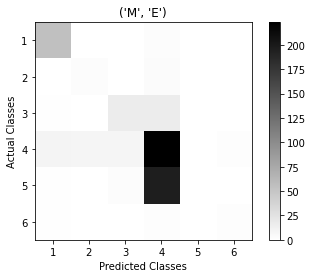

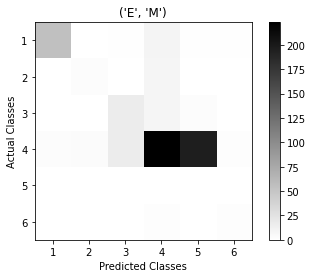

In [39]:
for k,v in cm.items():
  print(k)
  print(v.plot(title=k))

### Looking at total agreement counts for each label between each pair of annotators.
- Max agreement is for FE, then RE and then Neutral.
- Could also signify it is probably easier to agree on a Forward Entailment.
- Could also signify RE and Neutral are next most agreed labels.
- Could we say if agreement was most, complexity to identify each of these three labels was easy?

In [40]:
for k,v in cm.items():
  print(k)
  print(v.table)

('M', 'E')
{1: {1: 55, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0}, 2: {1: 0, 2: 3, 3: 0, 4: 4, 5: 0, 6: 0}, 3: {1: 1, 2: 0, 3: 17, 4: 17, 5: 0, 6: 0}, 4: {1: 10, 2: 9, 3: 9, 4: 223, 5: 0, 6: 2}, 5: {1: 1, 2: 0, 3: 3, 4: 196, 5: 0, 6: 0}, 6: {1: 1, 2: 0, 3: 0, 4: 2, 5: 0, 6: 2}}
('E', 'M')
{1: {1: 55, 2: 0, 3: 1, 4: 10, 5: 1, 6: 1}, 2: {1: 0, 2: 3, 3: 0, 4: 9, 5: 0, 6: 0}, 3: {1: 0, 2: 0, 3: 17, 4: 9, 5: 3, 6: 0}, 4: {1: 3, 2: 4, 3: 17, 4: 223, 5: 196, 6: 2}, 5: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}, 6: {1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 2}}


## Cohen Kappa scores for modified labels 
Total 558 * 2 = 1116 labels required by 2 annotators for 558 premise, hypothesis pairs.

1.  FE	- 126
2.  RE - 19
3.  Neutral - 698
4.  Negation - 64
5.  Cover - 0
6.  Alternation - 200
7.  Equivalence - 9

So we recalculate the Cohen kappa score: 25.68%

In [41]:
labellers = {1:'M', 2:'E'}
cohen_kappa_scores_modified = {}

cohen_kappa_scores_modified[(labellers[1], labellers[2])] = cohen_kappa_score(group1[labellers[1]], group1[labellers[2]])
print(cohen_kappa_scores_modified[(labellers[1], labellers[2])])

0.2568295855788887


## Fleiss Kappa scores
This is another way of finding above the level of agreement expected by chance. This considers random sampling among the raters (a little better than voted ratings, due to "randomness").
Although this is purely statistical, since we have types of modifiers which influence thge rater's choice of label, we consider this for some "randomized" assessment for a approximated agreement scores. 

The score considers that if no one chose "this" label, we could still find out expected chance of agreement on "this" label.

This does not tell if agreement is good enough. But just that if an agreement exists then how better is it to that of agreement by chance which in this case is 17.47%.

In [42]:
from statsmodels.stats import inter_rater as irr
data, categories = irr.aggregate_raters(modified_df[['M','E']].to_numpy())
irr.fleiss_kappa(data, method='fleiss')

0.17479988192101895

### Krippendorff's Alpha
Essentially measures amount of reliability as a measure of disagreement.
However this might not be relevant here, since we do not have concrete Ground truth. But if we did assume we did have Ground truth and this was reliable, this is how much reliable these labels based on agreement calculated from ratio of observed disagreement and disagreement expected by chance can be.

Here krippendorff's alpha is 67.99%

In [43]:
import krippendorff
krippendorff.alpha(modified_df[['M','E']].to_numpy().T)

0.6799536781572222

In [44]:
modified_df.to_numpy()

array([[90, 'a man is jumping into an empty pool',
        'a man is jumping into a full pool', ..., 'NONE', 3, 3],
       [90, 'every man is jumping into an empty pool',
        'a man is jumping into a full pool', ..., 'Subject', 5, 3],
       [90, 'a man is jumping into an empty pool',
        'every man is jumping into a full pool', ..., 'Subject', 3, 3],
       ...,
       [168, 'A child is hitting a an elegant baseball',
        'A child is missing a baseball\n', ..., 'Object', 5, 4],
       [168, 'A child is hitting a baseball',
        'A child is missing a an elegant baseball', ..., 'Object', 5, 4],
       [168, 'A child is hitting a an elegant baseball',
        'A child is missing a an elegant baseball', ..., 'Object', 5, 4]],
      dtype=object)

In [45]:
import agreement
from agreement.utils.kernels import linear_kernel

from agreement.metrics import cohens_kappa, krippendorffs_alpha, scotts_pi
from agreement.utils.transform import pivot_table_frequency


In [46]:
this_array = []
for i,l in enumerate(modified_df[['M','E']].to_numpy()):
  for k in range(0,2):
    this_array.append([i,k+1, l[k]])
arr = np.array(this_array)
questions_answers_table = pivot_table_frequency(arr[:, 0], arr[:, 2])

### Recomputing Cohen's kappa, krippendorff's alpha while calculating Scott's pi

Scott's Pi is similar to Cohen's kappa, except it considered squared joint proportions to calculate inter-annotator reliability.

In this case, Scott's pi is 17.47% same as Cohen's kappa

In [47]:
users_answers_table = pivot_table_frequency(arr[:, 1], arr[:, 2])
kappa = cohens_kappa(questions_answers_table, users_answers_table)
weighted_kappa = cohens_kappa(questions_answers_table, users_answers_table, weights_kernel=linear_kernel)

alpha = krippendorffs_alpha(questions_answers_table)
pi = scotts_pi(questions_answers_table)

In [48]:
kappa, weighted_kappa, alpha, pi

(0.2568295855788888,
 0.499315533366311,
 0.17553930855012206,
 0.17479988192101903)

## Agreements based on Quantifier & Modified SVO

In [49]:
u = ["every", "always", "never", "everyone of"]
e = ["some", "at least", "exactly one", "all but one"]
n = ["not every", "no", "not"]
adj = ["green", "happy", "sad", "good", "bad", "abnormally", "elegantly", "an elegant", "an abnormal"]

In [50]:
def get_quantifier_type(x):
  if x in u:
    return "Universal"
  elif x in e:
    return "Existential"
  elif x in n:
    return "Negation"
  elif x in adj:
    return "Adjectives/Adverbs"
  else:
    return "NONE"

In [51]:
group1['Quantifier Type'] = group1['Modifier'].apply(lambda x: get_quantifier_type(x)  )
group1

,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Part of Premise/Hypothesis Modified,M,E,Quantifier Type
0,90,a man is jumping into an empty pool,a man is jumping into a full pool,NONE,NONE,NONE,3,3,NONE
1,90,every man is jumping into an empty pool,a man is jumping into a full pool,every,Premise,Subject,5,3,Universal
2,90,a man is jumping into an empty pool,every man is jumping into a full pool,every,Hypothesis,Subject,3,3,Universal
3,90,every man is jumping into an empty pool,every man is jumping into a full pool,every,Both,Subject,3,3,Universal
4,90,some man is jumping into an empty pool,a man is jumping into a full pool,some,Premise,Subject,5,4,Existential
...,...,...,...,...,...,...,...,...,...
88,168,A child is hitting a baseball,A child is missing exactly one baseball,exactly one,Hypothesis,Object,5,4,Existential
89,168,A child is hitting exactly one baseball,A child is missing exactly one baseball,exactly one,Both,Object,5,4,Existential
90,168,A child is hitting a an elegant baseball,A child is missing a baseball\n,an elegant,Premise,Object,5,4,Adjectives/Adverbs
91,168,A child is hitting a baseball,A child is missing a an elegant baseball,an elegant,Hypothesis,Object,5,4,Adjectives/Adverbs


In [67]:
cm_one_way = ConfusionMatrix(actual_vector=group1['M'].to_list(), predict_vector=group1['E'].to_list())
cm_two_way = ConfusionMatrix(actual_vector=group1['E'].to_list(), predict_vector=group1['M'].to_list())

cp = Compare({"M_E":cm_one_way,"E_M":cm_two_way})
print(cp)

Best : M_E

Rank  Name   Class-Score       Overall-Score
1     M_E    0.50556           0.31389
2     E_M    0.50417           0.31389



In [ ]:
cm_one_way.relabel(mapping= {k:lmap[k] for k in cm_one_way.classes})
cm_two_way.relabel(mapping= {k:lmap[k] for k in cm_two_way.classes})

In [69]:
cp.best, cp.sorted, cp.best_name

(pycm.ConfusionMatrix(classes: ['Alternation', 'Equivalence', 'FE', 'Negation', 'Neutral', 'RE']),
 ['M_E', 'E_M'],
 'M_E')

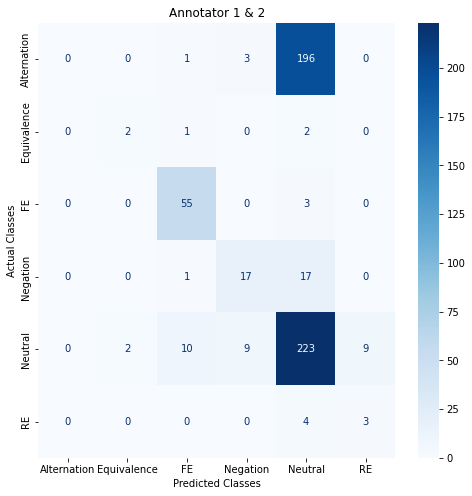

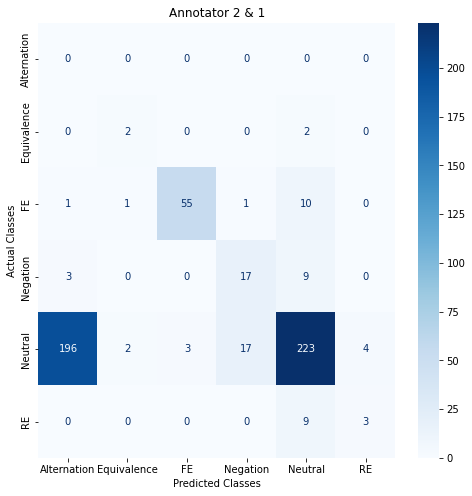

In [70]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
cm_one_way.plot(cmap=plt.cm.Blues,number_label=True,plot_lib="seaborn")
plt.title("Annotator 1 & 2")
plt.savefig('blocks_ann12.png', dpi=100)
cm_two_way.plot(cmap=plt.cm.Blues,number_label=True,plot_lib="seaborn")
plt.title("Annotator 2 & 1")
plt.savefig('blocks_ann21.png', dpi=100)

In [80]:
group1 = group1.rename(columns={'Part of Premise/Hypothesis Modified':'Modified SUBJ/VERB/OBJECT'})
res = group1.groupby(['Modified SUBJ/VERB/OBJECT', 'M', 'E']).count().reset_index()[[ 'Quantifier Type', 'Modified SUBJ/VERB/OBJECT', 'M', 'E','Premise/Hypothesis/Both']]
r = res.sort_values(by='Premise/Hypothesis/Both',ascending=False)[['Modified SUBJ/VERB/OBJECT','M', 'E','Quantifier Type']]
r= r.rename(columns={ 'Quantifier Type':'Count'})
print("****** Counts for Modified SUBJ/VERB/OBJECT and annotators 1 & 2 ******** ")
r

****** Counts for Modified SUBJ/VERB/OBJECT and annotators 1 & 2 ******** 


,Modified SUBJ/VERB/OBJECT,M,E,Count
23,Subject,Neutral,Neutral,94
4,Object,Alternation,Neutral,91
11,Object,Neutral,Neutral,87
15,Subject,Alternation,Neutral,73
36,Verb,Neutral,Neutral,36
29,Verb,Alternation,Neutral,32
7,Object,FE,FE,24
16,Subject,FE,FE,20
19,Subject,Negation,Negation,16
32,Verb,FE,FE,8


In [81]:
r.to_excel("blocks_ann_12_modifier.xlsx")

In [73]:
group1['Quantifier Type'].value_counts()

Adjectives/Adverbs    252
Existential           126
Universal              90
Negation               72
NONE                   18
Name: Quantifier Type, dtype: int64

In [74]:
group1['Modified SUBJ/VERB/OBJECT'].value_counts()

Subject    234
Object     216
Verb        90
NONE        18
Name: Modified SUBJ/VERB/OBJECT, dtype: int64

In [75]:
r = group1.groupby(['M', 'E',]).count().reset_index()[['M', 'E',	'Premise']]
r.rename(columns={'Premise':"Count"}).sort_values(by='Count', ascending=False)

,M,E,Count
14,Neutral,Neutral,223
2,Alternation,Neutral,196
6,FE,FE,55
9,Negation,Negation,17
10,Negation,Neutral,17
12,Neutral,FE,10
15,Neutral,RE,9
13,Neutral,Negation,9
16,RE,Neutral,4
17,RE,RE,3


In [76]:
r.rename(columns={'Premise':"Count"}).sort_values(by='Count', ascending=False).to_excel("disagreement_labels_ann_12.xlsx")

In [64]:
rev_label_map = {v:k for k,v in label_map.items()}
for i in ['M', 'E']:
  group1[i] = group1[i].map(rev_label_map)

In [77]:
res3 = group1.groupby(['Quantifier Type','M','E']).count().reset_index()
result = res3[['Quantifier Type','M','E', 'Premise/Hypothesis/Both']]
print("****** The confused predictions for each modifier for two annotators are: ******")
result = result.rename(columns={"Premise/Hypothesis/Both":"Counts"})
result[result['M'] != result['E']].sort_values(by="Counts", ascending =False)

****** The confused predictions for each modifier for two annotators are: ******


,Quantifier Type,M,E,Counts
0,Adjectives/Adverbs,Alternation,Neutral,126
3,Existential,Alternation,Neutral,48
33,Universal,Alternation,Neutral,16
14,NONE,Negation,Neutral,8
39,Universal,Neutral,Negation,7
17,Negation,Alternation,Neutral,6
29,Negation,Neutral,RE,5
6,Existential,Negation,Neutral,5
26,Negation,Neutral,FE,5
37,Universal,Negation,Neutral,3


In [79]:
result[result['M'] != result['E']].sort_values(by="Counts", ascending =False).to_excel("blocks_ann_12_quantifier.xlsx")